In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# density

In [2]:
df31 = pd.read_excel(r'C:\Users\Default\Documents\transect_densities.xlsx', engine='openpyxl', sheet_name='31', index_col=0, parse_dates=True)
df31.loc['avg'] = df31.mean()
df31.loc['stdv'] = df31.std()

df31_transposed = df31.T
df31_transposed = df31_transposed.resample('10D').mean()

df31_transposed.reset_index(inplace=True)
df31_transposed['day'] = df31_transposed['index'].dt.day
df31_transposed['month'] = df31_transposed['index'].dt.month
df31_transposed['year'] = df31_transposed['index'].dt.year

rols = ['day', 'month', 'year']
df31_transposed['day_month_year'] = df31_transposed[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['month', 'year']
df31_transposed['month_year'] = df31_transposed[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df31_transposed = df31_transposed.sort_values(by="index")
df31_transposed.set_index('index', inplace=True)

df31_boxplot = df31_transposed.T

df31_transposed

,0,1,2,3,4,5,6,7,8,9,avg,stdv,day,month,year,day_month_year,month_year
index,,,,,,,,,,,,,,,,,
1988-12-10,0.31,0.30,0.36,0.33,0.22,0.22,0.35,0.29,0.35,0.33,0.306,0.048000,10,12,1988,10-12-1988,12-1988
1988-12-20,0.31,0.36,0.21,0.32,0.30,0.30,0.27,0.33,0.30,0.29,0.299,0.037537,20,12,1988,20-12-1988,12-1988
1988-12-30,0.31,0.30,0.29,0.28,0.28,0.34,0.28,0.32,0.31,0.31,0.302,0.018868,30,12,1988,30-12-1988,12-1988
1989-01-09,0.30,0.32,0.37,0.36,0.30,0.35,0.33,0.30,0.34,0.32,0.329,0.024269,9,1,1989,9-1-1989,1-1989
1989-01-19,0.31,0.28,0.35,0.32,0.35,0.34,0.34,0.37,0.36,0.35,0.337,0.025318,19,1,1989,19-1-1989,1-1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-02-18,0.33,0.32,0.28,0.36,0.33,0.28,0.37,0.31,0.35,0.35,0.328,0.029597,18,2,1991,18-2-1991,2-1991
1991-02-28,0.35,0.30,0.38,0.37,0.37,0.31,0.36,0.31,0.32,0.34,0.341,0.027731,28,2,1991,28-2-1991,2-1991
1991-03-10,0.37,0.38,0.30,0.35,0.31,0.38,0.36,0.33,0.32,0.36,0.346,0.027641,10,3,1991,10-3-1991,3-1991


In [3]:
df30 = pd.read_excel(r'C:\Users\Default\Documents\transect_densities.xlsx', engine='openpyxl', sheet_name='30', parse_dates=True, index_col=0)
df30.loc['avg'] = df30.mean()
df30.loc['std'] = df30.std()

df30_transposed = df30.T
df30_transposed = df30_transposed.resample('10D').mean()

df30_transposed.reset_index(inplace=True)
df30_transposed['day'] = df30_transposed['index'].dt.day
df30_transposed['month'] = df30_transposed['index'].dt.month
df30_transposed['year'] = df30_transposed['index'].dt.year

rols = ['day', 'month', 'year']
df30_transposed['day_month_year'] = df30_transposed[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['month', 'year']
df30_transposed['month_year'] = df30_transposed[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df30_transposed = df30_transposed.sort_values(by="index")
df30_transposed.set_index('index', inplace=True)

df30_boxplot = df30_transposed.T

df30_transposed

,0,1,2,3,4,5,6,7,8,9,avg,std,day,month,year,day_month_year,month_year
index,,,,,,,,,,,,,,,,,
1987-11-10,0.29,0.26,0.23,0.25,0.26,0.26,0.28,0.23,0.23,0.29,0.258,0.022271,10,11,1987,10-11-1987,11-1987
1987-11-20,0.32,0.37,0.26,0.33,0.32,0.38,0.34,0.28,0.35,0.32,0.327,0.034943,20,11,1987,20-11-1987,11-1987
1987-11-30,0.30,0.29,0.26,0.29,0.30,0.29,0.31,0.32,0.32,0.27,0.295,0.018574,30,11,1987,30-11-1987,11-1987
1987-12-10,0.28,0.30,0.26,0.31,0.28,0.29,0.27,0.26,0.28,0.25,0.278,0.017776,10,12,1987,10-12-1987,12-1987
1987-12-20,0.29,0.27,0.32,0.29,0.32,0.29,0.30,0.32,0.30,0.21,0.291,0.031129,20,12,1987,20-12-1987,12-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-01-23,0.20,0.21,0.26,0.20,0.20,0.21,0.30,0.22,0.23,0.28,0.231,0.034482,23,1,1991,23-1-1991,1-1991
1991-02-02,0.23,0.21,0.30,0.29,0.22,0.20,0.26,0.24,0.22,0.31,0.248,0.037630,2,2,1991,2-2-1991,2-1991
1991-02-12,0.30,0.22,0.30,0.27,0.25,0.29,0.27,0.29,0.27,0.26,0.272,0.023580,12,2,1991,12-2-1991,2-1991


In [4]:
df26 = pd.read_excel(r'C:\Users\Default\Documents\transect_densities.xlsx', engine='openpyxl', sheet_name='26', parse_dates=True, index_col=0)
df26.loc['avg'] = df26.mean()
df26.loc['std'] = df26.std()

df26_transposed = df26.T
df26_transposed = df26_transposed.resample('10D').mean()

df26_transposed.reset_index(inplace=True)
df26_transposed['day'] = df26_transposed['index'].dt.day
df26_transposed['month'] = df26_transposed['index'].dt.month
df26_transposed['year'] = df26_transposed['index'].dt.year

rols = ['day', 'month', 'year']
df26_transposed['day_month_year'] = df26_transposed[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['month', 'year']
df26_transposed['month_year'] = df26_transposed[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df26_transposed = df26_transposed.sort_values(by="index")
df26_transposed.set_index('index', inplace=True)

df26_boxplot = df26_transposed.T

df26_transposed

,0,1,2,3,4,avg,std,day,month,year,day_month_year,month_year
index,,,,,,,,,,,,
1983-06-10,0.27,0.26,0.33,0.37,0.32,0.310,0.040497,10,6,1983,10-6-1983,6-1983
1983-06-20,0.33,0.29,0.32,0.37,0.35,0.332,0.027129,20,6,1983,20-6-1983,6-1983
1983-06-30,0.38,0.28,0.30,0.49,0.42,0.374,0.077356,30,6,1983,30-6-1983,6-1983
1983-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,7,1983,10-7-1983,7-1983
1983-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,7,1983,20-7-1983,7-1983
...,...,...,...,...,...,...,...,...,...,...,...,...
1986-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,1986,5-1-1986,1-1986
1986-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,1,1986,15-1-1986,1-1986
1986-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,1,1986,25-1-1986,1-1986


# boxplots

In [5]:
df31_boxplot.T.index
df31_boxplot.iloc[1:10,:]

index,1988-12-10,1988-12-20,1988-12-30,1989-01-09,1989-01-19,1989-01-29,1989-02-08,1989-02-18,1989-02-28,1989-03-10,...,1990-12-30,1991-01-09,1991-01-19,1991-01-29,1991-02-08,1991-02-18,1991-02-28,1991-03-10,1991-03-20,1991-03-30
1,0.3,0.36,0.3,0.32,0.28,0.34,0.34,0.3,0.31,0.3,...,0.26,0.28,0.28,0.26,0.29,0.32,0.3,0.38,0.36,0.38
2,0.36,0.21,0.29,0.37,0.35,0.4,0.33,0.35,0.33,0.35,...,0.18,0.23,0.19,0.29,0.32,0.28,0.38,0.3,0.31,0.36
3,0.33,0.32,0.28,0.36,0.32,0.37,0.32,0.31,0.34,0.34,...,0.35,0.26,0.24,0.3,0.35,0.36,0.37,0.35,0.38,0.39
4,0.22,0.3,0.28,0.3,0.35,0.37,0.3,0.32,0.36,0.34,...,0.26,0.22,0.25,0.35,0.27,0.33,0.37,0.31,0.37,0.32
5,0.22,0.3,0.34,0.35,0.34,0.27,0.3,0.32,0.33,0.33,...,0.19,0.21,0.21,0.22,0.32,0.28,0.31,0.38,0.33,0.32
6,0.35,0.27,0.28,0.33,0.34,0.28,0.32,0.3,0.3,0.33,...,0.22,0.19,0.26,0.25,0.37,0.37,0.36,0.36,0.37,0.38
7,0.29,0.33,0.32,0.3,0.37,0.34,0.37,0.3,0.32,0.33,...,0.35,0.2,0.27,0.34,0.3,0.31,0.31,0.33,0.38,0.33
8,0.35,0.3,0.31,0.34,0.36,0.38,0.35,0.35,0.32,0.3,...,0.3,0.22,0.2,0.23,0.33,0.35,0.32,0.32,0.32,0.3
9,0.33,0.29,0.31,0.32,0.35,0.38,0.33,0.33,0.33,0.31,...,0.27,0.25,0.25,0.36,0.36,0.35,0.34,0.36,0.33,0.36


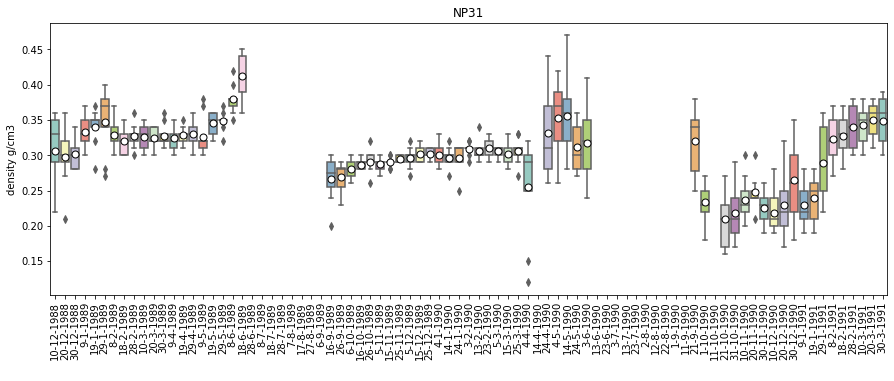

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))

h = sns.boxplot(data=df31_boxplot.iloc[1:10,:], palette="Set3",ax=ax, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})

h.set_xticklabels(df31_transposed.day_month_year, rotation=90)
plt.locator_params(axis='x', nbins=100)
plt.title('NP31')
plt.ylabel('density g/cm3')
plt.xlabel(' ')


plt.show()

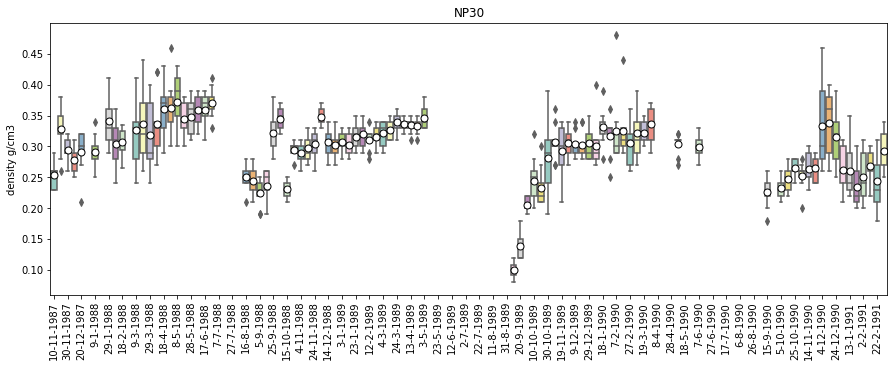

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))

g = sns.boxplot(data=df30_boxplot.iloc[1:10,:], palette="Set3",ax=ax, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})

g.set_xticklabels(df30_transposed.day_month_year, rotation=90)
plt.locator_params(axis='x', nbins=100)
plt.title('NP30')
plt.ylabel('density g/cm3')
plt.xlabel(' ')


plt.show()

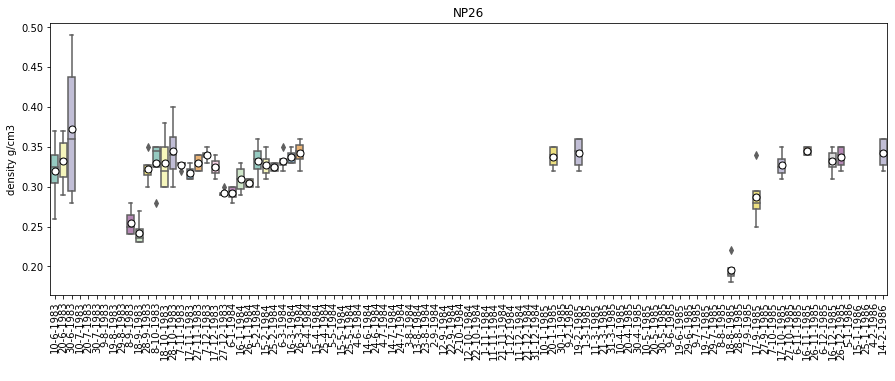

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

g = sns.boxplot(data=df26_boxplot.iloc[1:5,:], palette="Set3",ax=ax, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"})

g.set_xticklabels(df26_transposed.day_month_year, rotation=90)
plt.locator_params(axis='x', nbins=100)
plt.title('NP26')
plt.ylabel('density g/cm3')
plt.xlabel(' ')


plt.show()

# depth

In [9]:
dep30 = pd.read_excel(r'C:\Users\Default\Documents\transect_depths.xlsx', engine='openpyxl', sheet_name='30', index_col=0, parse_dates=True)
dep30.loc['avg'] = dep30.mean()
dep30.loc['stdv'] = dep30.std()

dep30_transposed = dep30.T # or df1.transpose()
dep30_transposed = dep30_transposed.resample('W-MON').mean()

dep30_transposed.reset_index(inplace=True)
dep30_transposed['day'] = dep30_transposed['index'].dt.day
dep30_transposed['month'] = dep30_transposed['index'].dt.month
dep30_transposed['year'] = dep30_transposed['index'].dt.year

rols = ['month', 'year']
dep30_transposed['month_year'] = dep30_transposed[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dep30_transposed = dep30_transposed.sort_values(by="index")
dep30_transposed.set_index('index', inplace=True)

dep30_transposed

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,avg,stdv,day,month,year,month_year
index,,,,,,,,,,,,,,,,,,,,,
1987-11-16,10.0,14.0,26.0,18.0,4.0,15.0,38.0,10.0,10.0,10.0,...,9.0,10.0,33.0,7.0,16.627451,9.751744,16,11,1987,11-1987
1987-11-23,20.0,6.0,7.0,17.0,39.0,15.0,24.0,29.0,11.0,39.0,...,10.0,18.0,13.0,12.0,18.686275,9.657853,23,11,1987,11-1987
1987-11-30,30.0,8.0,9.0,10.0,26.0,14.0,29.0,10.0,10.0,11.0,...,14.0,16.0,19.0,21.0,17.862745,8.867255,30,11,1987,11-1987
1987-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7,12,1987,12-1987
1987-12-14,12.0,27.0,37.0,10.0,9.0,9.0,15.0,22.0,25.0,11.0,...,12.0,18.0,29.0,13.0,19.215686,10.163977,14,12,1987,12-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-02-11,10.0,24.0,20.0,21.0,25.0,13.0,37.0,20.0,31.0,49.0,...,17.0,15.0,37.0,13.0,24.764706,10.485449,11,2,1991,2-1991
1991-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,18,2,1991,2-1991
1991-02-25,21.0,15.0,20.0,15.0,37.0,20.0,40.0,47.0,21.0,45.0,...,18.0,10.0,25.0,16.0,26.176471,10.567627,25,2,1991,2-1991


In [10]:
dep31 = pd.read_excel(r"C:\Users\Default\Documents\transect_depths.xlsx", engine='openpyxl', sheet_name='31', index_col=0, parse_dates=True)
dep31.loc['avg'] = dep31.mean()
dep31.loc['std'] = dep31.std()

dep31_transposed = dep31.T
dep31_transposed = dep31_transposed.resample('W-MON').mean()

dep31_transposed.reset_index(inplace=True)
dep31_transposed['day'] = dep31_transposed['index'].dt.day
dep31_transposed['month'] = dep31_transposed['index'].dt.month
dep31_transposed['year'] = dep31_transposed['index'].dt.year

dep31_transposed = dep31_transposed.sort_values(by="index")
dep31_transposed.set_index('index', inplace=True)

dep31_transposed

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,avg,std,day,month,year
index,,,,,,,,,,,,,,,,,,,,,
1988-12-12,10.0,45.0,36.0,23.0,30.0,23.0,23.0,12.0,36.0,12.0,...,10.0,14.0,26.0,37.0,36.0,26.960784,11.965573,12,12,1988
1988-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,12,1988
1988-12-26,20.0,49.0,32.0,28.0,23.0,25.0,40.0,16.0,21.0,20.0,...,16.0,10.0,15.0,30.0,26.0,26.000000,11.318907,26,12,1988
1989-01-02,30.0,44.0,30.0,28.0,26.0,20.0,39.0,30.0,20.0,21.0,...,30.0,14.0,19.0,27.0,25.0,28.215686,10.646391,2,1,1989
1989-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-03-04,28.0,38.0,43.0,40.0,56.0,35.0,22.0,48.0,35.0,29.0,...,54.0,38.0,41.0,37.0,21.0,35.960784,13.042857,4,3,1991
1991-03-11,10.0,36.0,49.0,30.0,38.0,45.0,50.0,50.0,38.0,31.0,...,25.0,21.0,16.0,37.0,40.0,35.666667,14.505802,11,3,1991
1991-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,3,1991


In [11]:
dep26 = pd.read_excel(r"C:\Users\Default\Documents\transect_depths.xlsx", engine='openpyxl', sheet_name='26', index_col=0, parse_dates=True)
dep26.loc['avg'] = dep26.mean()
dep26.loc['std'] = dep26.std()

dep26_transposed = dep26.T
dep26_transposed = dep26_transposed.resample('W-MON').mean()

dep26_transposed.reset_index(inplace=True)
dep26_transposed['day'] = dep26_transposed['index'].dt.day
dep26_transposed['month'] = dep26_transposed['index'].dt.month
dep26_transposed['year'] = dep26_transposed['index'].dt.year

dep26_transposed = dep26_transposed.sort_values(by="index")
dep26_transposed.set_index('index', inplace=True)

dep26_transposed

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,avg,std,day,month,year
index,,,,,,,,,,,,,,,,,,,,,
1983-06-13,10.0,11.0,20.0,29.0,9.0,27.0,56.0,28.0,17.0,67.0,...,13.0,6.0,10.0,54.0,14.0,25.745098,16.624861,13,6,1983
1983-06-20,20.0,23.0,18.0,32.0,36.0,30.0,14.0,49.0,17.0,16.0,...,11.0,7.0,12.0,46.0,14.0,25.901961,14.787720,20,6,1983
1983-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,6,1983
1983-07-04,31.0,18.0,15.0,32.0,30.0,25.0,41.0,33.0,15.0,11.0,...,9.0,5.0,9.0,43.0,12.0,23.117647,12.465870,4,7,1983
1983-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,7,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,1,1986
1986-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1986
1986-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,1986


In [12]:
df = pd.DataFrame({"NP31_depth":dep31_transposed.avg, "0":df31_transposed.iloc[:,0], "1":df31_transposed.iloc[:,1], "2":df31_transposed.iloc[:,2], "3":df31_transposed.iloc[:,3], "4":df31_transposed.iloc[:,4], "5":df31_transposed.iloc[:,5], "6":df31_transposed.iloc[:,6], "7":df31_transposed.iloc[:,7], "8":df31_transposed.iloc[:,8],"9":df31_transposed.iloc[:,9]}, index=None, columns=None)
                   
#df = df[df.wind_speed > 5].dropna()

df.reset_index(inplace=True)
df['day'] = df['index'].dt.day
df['month'] = df['index'].dt.month
df['year'] = df['index'].dt.year
#df.set_index('index', inplace=True)

rols = ['day','month', 'year']
df['day_month_year'] = df[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

#cols = ['wind_speed']
#df[cols] = df[df[cols] > 10][cols]
#df.dropna()

df

,index,NP31_depth,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1988-12-10,NaN,0.31,0.30,0.36,0.33,0.22,0.22,0.35,0.29,0.35,0.33,10,12,1988,10-12-1988
1,1988-12-12,26.960784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,1988,12-12-1988
2,1988-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,12,1988,19-12-1988
3,1988-12-20,NaN,0.31,0.36,0.21,0.32,0.30,0.30,0.27,0.33,0.30,0.29,20,12,1988,20-12-1988
4,1988-12-26,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,12,1988,26-12-1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1991-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,3,1991,18-3-1991
190,1991-03-20,NaN,0.33,0.36,0.31,0.38,0.37,0.33,0.37,0.38,0.32,0.33,20,3,1991,20-3-1991
191,1991-03-25,39.117647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,3,1991,25-3-1991
192,1991-03-30,NaN,0.31,0.38,0.36,0.39,0.32,0.32,0.38,0.33,0.30,0.36,30,3,1991,30-3-1991


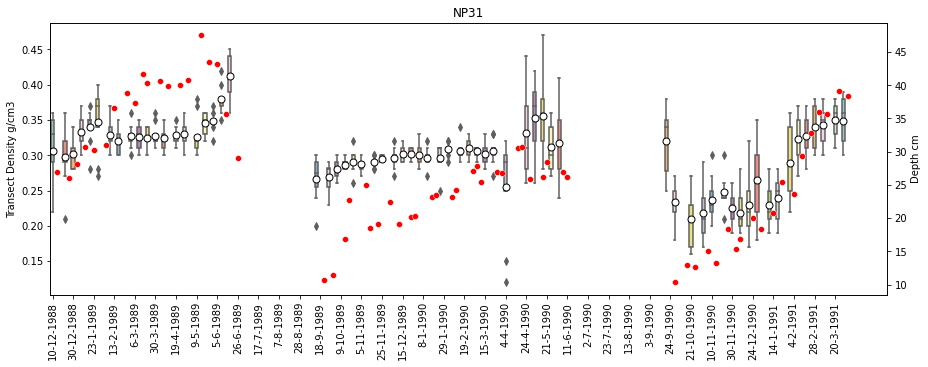

In [13]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df.iloc[:,3:12].T, ax=ax, palette="Set3", showmeans=True,meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df.index, y='NP31_depth', data=df, ax=ax2, ci=None, color='red')

ax.set_ylabel('Transect Density g/cm3')
ax2.set_xticks(df.index[::5])
ax.set_xticklabels(df.day_month_year[::5], rotation='vertical')
ax2.set_ylabel('Depth cm')
plt.title('NP31')
# the x-axis is labelled with wind dates, they're daily

plt.show()

In [14]:
df2 = pd.DataFrame({"NP30_depth":dep30_transposed.avg, "0":df30_transposed.iloc[:,0], "1":df30_transposed.iloc[:,1], "2":df30_transposed.iloc[:,2], "3":df30_transposed.iloc[:,3], "4":df30_transposed.iloc[:,4], "5":df30_transposed.iloc[:,5], "6":df30_transposed.iloc[:,6], "7":df30_transposed.iloc[:,7], "8":df30_transposed.iloc[:,8],"9":df30_transposed.iloc[:,9]}, index=None, columns=None)
                   
#df = df[df.wind_speed > 5].dropna()

df2.reset_index(inplace=True)
df2['day'] = df2['index'].dt.day
df2['month'] = df2['index'].dt.month
df2['year'] = df2['index'].dt.year
#df.set_index('index', inplace=True)

rols = ['day','month', 'year']
df2['day_month_year'] = df2[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

#cols = ['wind_speed']
#df[cols] = df[df[cols] > 10][cols]
#df.dropna()

df2

,index,NP30_depth,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1987-11-10,NaN,0.29,0.26,0.23,0.25,0.26,0.26,0.28,0.23,0.23,0.29,10,11,1987,10-11-1987
1,1987-11-16,16.627451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,11,1987,16-11-1987
2,1987-11-20,NaN,0.32,0.37,0.26,0.33,0.32,0.38,0.34,0.28,0.35,0.32,20,11,1987,20-11-1987
3,1987-11-23,18.686275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,11,1987,23-11-1987
4,1987-11-30,17.862745,0.30,0.29,0.26,0.29,0.30,0.29,0.31,0.32,0.32,0.27,30,11,1987,30-11-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,1991-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2,1991,18-2-1991
274,1991-02-22,NaN,0.31,0.27,0.23,0.27,0.29,0.31,0.18,0.23,0.21,0.20,22,2,1991,22-2-1991
275,1991-02-25,26.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,2,1991,25-2-1991
276,1991-03-04,28.078431,0.26,0.29,0.27,0.27,0.26,0.32,0.32,0.25,0.34,0.31,4,3,1991,4-3-1991


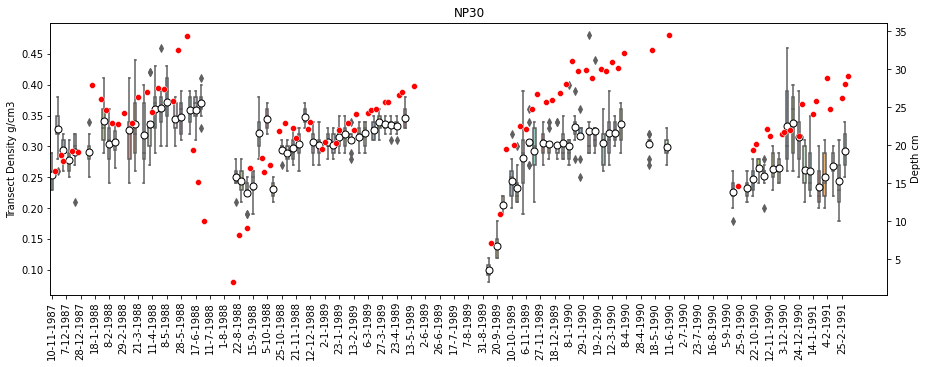

In [15]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df2.iloc[:,3:12].T, ax=ax, palette="Set3", showmeans=True,meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df2.index, y='NP30_depth', data=df2, ax=ax2, ci=None, color='red')

ax.set_ylabel('Transect Density g/cm3')
ax2.set_xticks(df2.index[::5])
ax.set_xticklabels(df2.day_month_year[::5], rotation='vertical')
ax2.set_ylabel('Depth cm')
plt.title('NP30')
# the x-axis is labelled with wind dates, they're daily

plt.show()

# Wind

In [12]:
import numpy as np

#Pythagora's Theorem function
pyt = lambda x, y: np.sqrt(x**2 + y**2)

# Example
pyt(3,2)

3.605551275463989

In [13]:
dw30 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_30.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
dw30.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

cols = ['year', 'month', 'day']
dw30['date'] = dw30[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dw30['date'] = pd.to_datetime(dw30.date, infer_datetime_format=True)

dw30.set_index('date', inplace=True)

# adding month_year
rols = ['month', 'year']
dw30['month_year'] = dw30[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# Adding a column for wind speed using the u and v components
dols = ['u_component_of_wind' , 'v_component_of_wind']
dw30['wind_speed']= dw30[dols].apply(lambda x: round(pyt(x[0],x[1]),2), axis="columns")

dw30 = dw30.resample('D').sum()

cols = ['wind_speed']
dw30[cols] = dw30[dw30[cols] > 10][cols]
dw30.dropna()

dw30

,station_id,year,month,day,time,u_component_of_wind,v_component_of_wind,wind_speed
date,,,,,,,,
1987-11-01,240,696,88,8,84,3.6,2.5,19.97
1987-11-02,240,696,88,16,84,1.0,6.6,22.01
1987-11-03,240,696,88,24,84,22.7,-7.7,32.03
1987-11-04,240,696,88,32,84,3.4,-1.9,NaN
1987-11-05,240,696,88,40,84,3.9,25.1,26.13
...,...,...,...,...,...,...,...,...
1991-02-24,240,728,16,192,84,24.1,-28.8,37.97
1991-02-25,240,728,16,200,84,33.2,-36.8,50.10
1991-02-26,240,728,16,208,84,25.1,-29.6,39.05


In [14]:
dw31 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_31.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
dw31.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

cols = ['year', 'month', 'day']
dw31['date'] = dw31[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dw31['date'] = pd.to_datetime(dw31.date, infer_datetime_format=True)

dw31.set_index('date', inplace=True)

# adding month_year
rols = ['month', 'year']
dw31['month_year'] = dw31[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

# Adding a column for wind speed using the u and v components
dols = ['u_component_of_wind' , 'v_component_of_wind']
dw31['wind_speed']= dw31[dols].apply(lambda x: round(pyt(x[0],x[1]),2), axis="columns")

dw31 = dw31.resample('D').sum()

cols = ['wind_speed']
dw31[cols] = dw31[dw31[cols] > 10][cols]
dw31.dropna()

dw31

,station_id,year,month,day,time,u_component_of_wind,v_component_of_wind,wind_speed
date,,,,,,,,
1988-12-01,31,88,12,1,21,-1.6,-3.7,NaN
1988-12-02,248,704,96,16,84,8.6,-34.5,37.03
1988-12-03,248,704,96,24,84,22.7,-28.2,36.88
1988-12-04,248,704,96,32,84,29.3,6.1,31.96
1988-12-05,248,704,96,40,84,34.3,14.1,41.07
...,...,...,...,...,...,...,...,...
1991-03-27,248,728,24,216,84,46.0,-29.9,55.00
1991-03-28,248,728,24,224,84,23.7,-13.4,27.86
1991-03-29,248,728,24,232,84,3.5,2.1,NaN


In [41]:
df3 = pd.DataFrame({"average_density":df30.iloc[10,:],"stdv_density":df30.iloc[11,:], "NP30_wind_speed":dw30.iloc[:,7], "0":df30_transposed.iloc[:,0], "1":df30_transposed.iloc[:,1], "2":df30_transposed.iloc[:,2], "3":df30_transposed.iloc[:,3], "4":df30_transposed.iloc[:,4], "5":df30_transposed.iloc[:,5], "6":df30_transposed.iloc[:,6], "7":df30_transposed.iloc[:,7], "8":df30_transposed.iloc[:,8],"9":df30_transposed.iloc[:,9]}, index=None, columns=None)

df3 = df3.resample('10D').sum()

df3.reset_index(inplace=True)
df3['day'] = df3['index'].dt.day
df3['month'] = df3['index'].dt.month
df3['year'] = df3['index'].dt.year
#df3.set_index('index', inplace=True)

cols = ['day','month', 'year']
df3['day_month_year'] = df3[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['average_density','0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df3[cols] = df3[df3[cols] != 0][cols]
#df3.dropna(inplace=True)

df3.head(20)

,index,average_density,stdv_density,NP30_wind_speed,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1987-11-01,0.258,0.022271,277.73,0.290,0.260,0.230,0.250,0.260,0.260,0.280,0.23,0.230,0.290,1,11,1987,1-11-1987
1,1987-11-11,0.327,0.034943,470.94,0.320,0.370,0.260,0.330,0.320,0.380,0.340,0.28,0.350,0.320,11,11,1987,11-11-1987
2,1987-11-21,0.295,0.018574,395.21,0.300,0.290,0.260,0.290,0.300,0.290,0.310,0.32,0.320,0.270,21,11,1987,21-11-1987
3,1987-12-01,NaN,0.000000,478.91,0.280,0.300,0.260,0.310,0.280,0.290,0.270,0.26,0.280,0.250,1,12,1987,1-12-1987
4,1987-12-11,0.569,0.048905,487.86,0.290,0.270,0.320,0.290,0.320,0.290,0.300,0.32,0.300,0.210,11,12,1987,11-12-1987
5,1987-12-21,NaN,0.000000,576.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,12,1987,21-12-1987
6,1987-12-31,NaN,0.000000,748.22,0.240,0.320,0.290,0.250,0.340,0.290,0.260,0.30,0.290,0.280,31,12,1987,31-12-1987
7,1988-01-10,0.286,0.029052,242.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,1988,10-1-1988
8,1988-01-20,NaN,0.000000,529.53,0.380,0.410,0.320,0.300,0.330,0.350,0.400,0.36,0.310,0.290,20,1,1988,20-1-1988
9,1988-01-30,0.345,0.039812,557.09,0.310,0.320,0.310,0.280,0.250,0.300,0.340,0.36,0.330,0.240,30,1,1988,30-1-1988


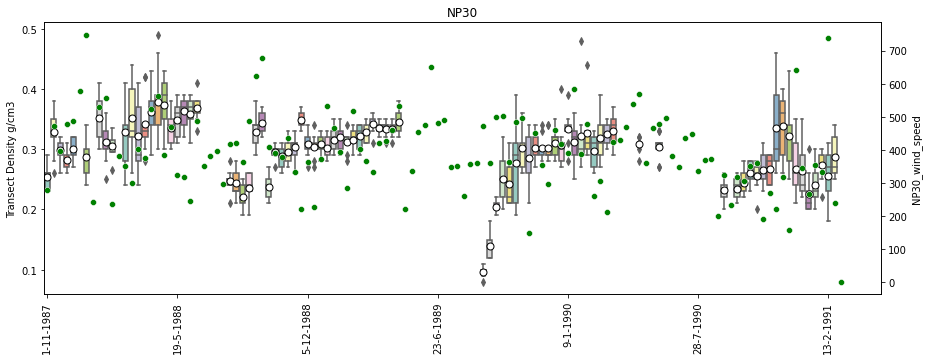

In [42]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df3.iloc[:,4:13].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df3.index, y='NP30_wind_speed', data=df3, ax=ax2, ci=None, color='green')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df3.index[::20])
ax.set_xticklabels(df3.day_month_year[::20], rotation=90)

ax2.

plt.title('NP30')

plt.show()

In [43]:
df4 = pd.DataFrame({"average_density":df31.iloc[10,:],"stdv_density":df31.iloc[11,:], "NP31_wind_speed":dw31.iloc[:,7], "0":df31_transposed.iloc[:,0], "1":df31_transposed.iloc[:,1], "2":df31_transposed.iloc[:,2], "3":df31_transposed.iloc[:,3], "4":df31_transposed.iloc[:,4], "5":df31_transposed.iloc[:,5], "6":df31_transposed.iloc[:,6], "7":df31_transposed.iloc[:,7], "8":df31_transposed.iloc[:,8],"9":df31_transposed.iloc[:,9]}, index=None, columns=None)

df4 = df4.resample('10D').sum()

df4.reset_index(inplace=True)
df4['day'] = df4['index'].dt.day
df4['month'] = df4['index'].dt.month
df4['year'] = df4['index'].dt.year
df4.set_index('index', inplace=False)

rols = ['day','month', 'year']
df4['day_month_year'] = df4[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

cols = ['average_density','0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
df4[cols] = df4[df4[cols] != 0][cols]

df4

,index,average_density,stdv_density,NP31_wind_speed,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1988-12-01,0.306,0.048000,320.08,0.31,0.30,0.36,0.33,0.22,0.22,0.35,0.29,0.35,0.33,1,12,1988,1-12-1988
1,1988-12-11,0.299,0.037537,300.42,0.31,0.36,0.21,0.32,0.30,0.30,0.27,0.33,0.30,0.29,11,12,1988,11-12-1988
2,1988-12-21,0.302,0.018868,507.24,0.31,0.30,0.29,0.28,0.28,0.34,0.28,0.32,0.31,0.31,21,12,1988,21-12-1988
3,1988-12-31,NaN,0.000000,642.09,0.30,0.32,0.37,0.36,0.30,0.35,0.33,0.30,0.34,0.32,31,12,1988,31-12-1988
4,1989-01-10,0.329,0.024269,487.53,0.31,0.28,0.35,0.32,0.35,0.34,0.34,0.37,0.36,0.35,10,1,1989,10-1-1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1991-02-19,0.669,0.057328,353.20,0.35,0.30,0.38,0.37,0.37,0.31,0.36,0.31,0.32,0.34,19,2,1991,19-2-1991
82,1991-03-01,0.346,0.027641,337.29,0.37,0.38,0.30,0.35,0.31,0.38,0.36,0.33,0.32,0.36,1,3,1991,1-3-1991
83,1991-03-11,0.348,0.025219,354.79,0.33,0.36,0.31,0.38,0.37,0.33,0.37,0.38,0.32,0.33,11,3,1991,11-3-1991
84,1991-03-21,NaN,0.000000,269.13,0.31,0.38,0.36,0.39,0.32,0.32,0.38,0.33,0.30,0.36,21,3,1991,21-3-1991


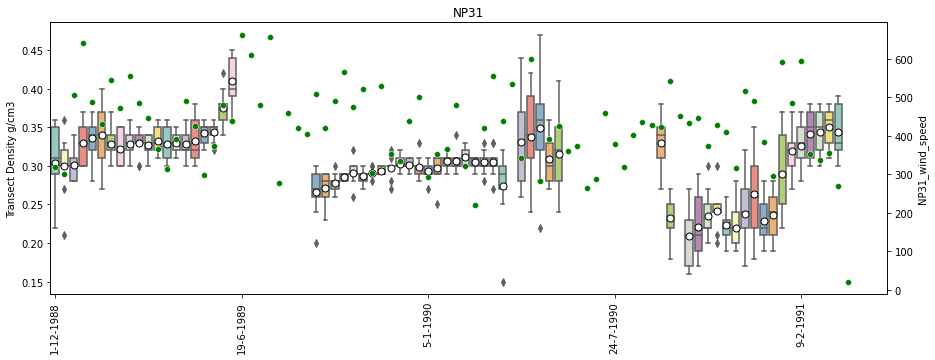

In [44]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df4.iloc[:,4:13].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df4.index, y='NP31_wind_speed', data=df4, ax=ax2, ci=None, color='green')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df4.index[::20])
ax.set_xticklabels(df4.day_month_year[::20], rotation=90)
plt.title('NP31')

plt.show()

# Precipitation

In [33]:
dp30 = pd.read_csv(r'C:\Users\Default\Documents\W99_clean\PRECIP\precip_NP30_full.csv', header=None, index_col=None, na_values=-9.9 or -9, delim_whitespace=True, names=['station_id', 'month', 'day', 'year', 'precipitation_amount', 'precipitation_type'])

cols = ['year', 'month', 'day']
dp30['date'] = dp30[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dp30['date'] = pd.to_datetime(dp30.date, infer_datetime_format=True)

rols = ['day', 'month', 'year']
dp30['day_month_year'] = dp30[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dp30.set_index('date', inplace=True)
dp30.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

dp30

,station_id,month,day,year,precipitation_amount,precipitation_type,day_month_year
date,,,,,,,
1987-11-01,30,11,1,1987,0.3,1.0,1-11-1987
1987-11-02,30,11,2,1987,0.4,1.0,2-11-1987
1987-11-03,30,11,3,1987,0.4,1.0,3-11-1987
1987-11-04,30,11,4,1987,0.0,1.0,4-11-1987
1987-11-05,30,11,5,1987,0.2,1.0,5-11-1987
...,...,...,...,...,...,...,...
1991-01-30,30,1,30,1991,1.2,1.0,30-1-1991
1991-02-01,30,2,1,1991,0.5,1.0,1-2-1991
1991-02-12,30,2,12,1991,0.3,1.0,12-2-1991


In [34]:
dp31 = pd.read_csv(r"C:\Users\Default\Documents\W99_clean\PRECIP\precip_NP31_full.csv", header=None, index_col=None, na_values=-9.9 or -9, delim_whitespace=True, names=['station_id', 'month', 'day', 'year', 'precipitation_amount', 'precipitation_type'])

cols = ['year', 'month', 'day']
dp31['date'] = dp31[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
dp31 = dp31.drop([58,422,786], axis=0)
dp31['date'] = pd.to_datetime(dp31.date, infer_datetime_format=True)

rols = ['month', 'year']
dp31['month_year'] = dp31[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dp31.set_index('date', inplace=True)
dp31.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

dp31

,station_id,month,day,year,precipitation_amount,precipitation_type,month_year
date,,,,,,,
1989-01-02,31,1,2,1989,0.6,1.0,1-1989
1989-01-05,31,1,5,1989,0.2,1.0,1-1989
1989-01-09,31,1,9,1989,0.2,1.0,1-1989
1989-01-10,31,1,10,1989,0.3,1.0,1-1989
1989-01-11,31,1,11,1989,0.7,1.0,1-1989
...,...,...,...,...,...,...,...
1991-03-26,31,3,26,1991,0.0,1.0,3-1991
1991-03-27,31,3,27,1991,0.0,1.0,3-1991
1991-03-28,31,3,28,1991,0.0,1.0,3-1991


In [35]:
dp26 = pd.read_csv(r"C:\Users\Default\Documents\W99_clean\PRECIP\precip_NP26_full.csv", header=None, index_col=None, na_values=-9.9 or -9, delim_whitespace=True, names=['station_id', 'month', 'day', 'year', 'precipitation_amount', 'precipitation_type'])

cols = ['year', 'month', 'day']
dp26['date'] = dp26[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
#dp26 = dp26.drop([58,422,786], axis=0)
dp26['date'] = pd.to_datetime(dp26.date, infer_datetime_format=True)

rols = ['month', 'year']
dp26['month_year'] = dp26[rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

dp26.set_index('date', inplace=True)
dp26.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

dp26

,station_id,month,day,year,precipitation_amount,precipitation_type,month_year
date,,,,,,,
1983-06-01,26,6,1,1983,0.0,1.0,6-1983
1983-06-02,26,6,2,1983,1.9,2.0,6-1983
1983-06-03,26,6,3,1983,0.4,2.0,6-1983
1983-06-04,26,6,4,1983,0.1,1.0,6-1983
1983-06-06,26,6,6,1983,0.1,1.0,6-1983
...,...,...,...,...,...,...,...
1984-12-24,26,12,24,1984,0.6,1.0,12-1984
1984-12-27,26,12,27,1984,0.0,1.0,12-1984
1984-12-28,26,12,28,1984,0.0,1.0,12-1984


<AxesSubplot:xlabel='date'>

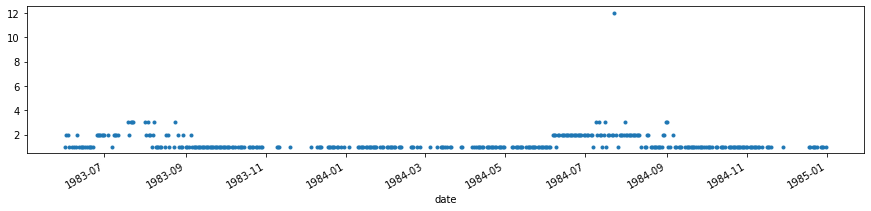

In [36]:
dp26.precipitation_type.plot(figsize=(15,3), style='.')

In [37]:
df5 = pd.DataFrame({"NP30_precipitation_type":dp30.precipitation_type, "NP30_precipitation_amount":dp30.precipitation_amount, "0":df30_transposed.iloc[:,0], "1":df30_transposed.iloc[:,1], "2":df30_transposed.iloc[:,2], "3":df30_transposed.iloc[:,3], "4":df30_transposed.iloc[:,4], "5":df30_transposed.iloc[:,5], "6":df30_transposed.iloc[:,6], "7":df30_transposed.iloc[:,7], "8":df30_transposed.iloc[:,8],"9":df30_transposed.iloc[:,9]}, index=None, columns=None)
df5 = df5.resample('W-MON').mean()

df5.reset_index(inplace=True)
df5['day'] = df5['index'].dt.day
df5['month'] = df5['index'].dt.month
df5['year'] = df5['index'].dt.year
#df.set_index('index', inplace=True)

cols = ['day','month', 'year']
df5['day_month_year'] = df5[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df5

,index,NP30_precipitation_type,NP30_precipitation_amount,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1987-11-02,1.0,0.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,11,1987,2-11-1987
1,1987-11-09,1.0,0.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,11,1987,9-11-1987
2,1987-11-16,1.0,0.100000,0.29,0.26,0.23,0.25,0.26,0.26,0.28,0.23,0.23,0.29,16,11,1987,16-11-1987
3,1987-11-23,1.0,0.500000,0.32,0.37,0.26,0.33,0.32,0.38,0.34,0.28,0.35,0.32,23,11,1987,23-11-1987
4,1987-11-30,1.0,0.160000,0.30,0.29,0.26,0.29,0.30,0.29,0.31,0.32,0.32,0.27,30,11,1987,30-11-1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1991-02-04,1.0,0.733333,0.23,0.21,0.30,0.29,0.22,0.20,0.26,0.24,0.22,0.31,4,2,1991,4-2-1991
171,1991-02-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2,1991,11-2-1991
172,1991-02-18,1.0,0.350000,0.30,0.22,0.30,0.27,0.25,0.29,0.27,0.29,0.27,0.26,18,2,1991,18-2-1991
173,1991-02-25,1.0,0.000000,0.31,0.27,0.23,0.27,0.29,0.31,0.18,0.23,0.21,0.20,25,2,1991,25-2-1991


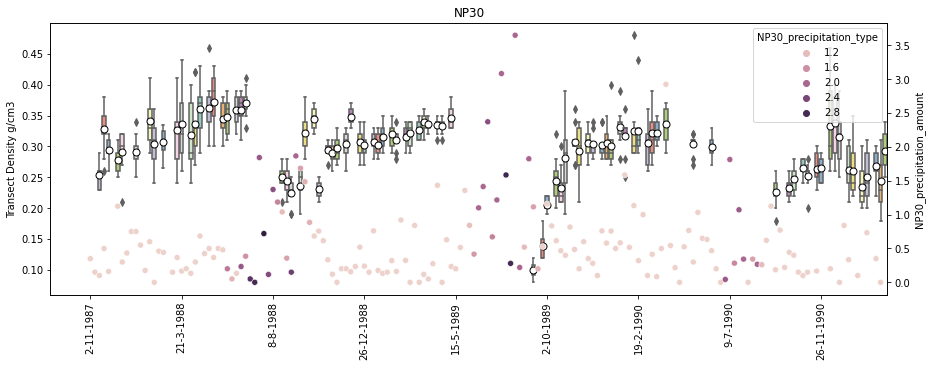

In [38]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df5.iloc[:,4:13].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df5.index, y="NP30_precipitation_amount", data=df5, hue='NP30_precipitation_type', ax=ax2, ci=None)
#sns.scatterplot(x=df4.index, y='NP31_wind_speed', data=df4, ax=ax2, ci=None, color='green')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df5.index[::20])
ax.set_xticklabels(df5.day_month_year[::20], rotation=90)
plt.title('NP30')

plt.show()

In [39]:
df6 = pd.DataFrame({"NP31_precipitation_type":dp31.precipitation_type, "NP31_precipitation_amount":dp31.precipitation_amount, "0":df31_transposed.iloc[:,0], "1":df31_transposed.iloc[:,1], "2":df31_transposed.iloc[:,2], "3":df31_transposed.iloc[:,3], "4":df31_transposed.iloc[:,4], "5":df31_transposed.iloc[:,5], "6":df31_transposed.iloc[:,6], "7":df31_transposed.iloc[:,7], "8":df31_transposed.iloc[:,8],"9":df31_transposed.iloc[:,9]}, index=None, columns=None)
df6 = df6.resample('W-MON').mean()

df6.reset_index(inplace=True)
df6['day'] = df6['index'].dt.day
df6['month'] = df6['index'].dt.month
df6['year'] = df6['index'].dt.year
#df.set_index('index', inplace=True)

cols = ['day','month', 'year']
df6['day_month_year'] = df6[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df6

,index,NP31_precipitation_type,NP31_precipitation_amount,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1988-12-12,NaN,NaN,0.31,0.30,0.36,0.33,0.22,0.22,0.35,0.29,0.35,0.33,12,12,1988,12-12-1988
1,1988-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,12,1988,19-12-1988
2,1988-12-26,NaN,NaN,0.31,0.36,0.21,0.32,0.30,0.30,0.27,0.33,0.30,0.29,26,12,1988,26-12-1988
3,1989-01-02,1.0,0.600000,0.31,0.30,0.29,0.28,0.28,0.34,0.28,0.32,0.31,0.31,2,1,1989,2-1-1989
4,1989-01-09,1.0,0.200000,0.30,0.32,0.37,0.36,0.30,0.35,0.33,0.30,0.34,0.32,9,1,1989,9-1-1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1991-03-04,1.0,0.066667,0.35,0.30,0.38,0.37,0.37,0.31,0.36,0.31,0.32,0.34,4,3,1991,4-3-1991
117,1991-03-11,1.0,0.100000,0.37,0.38,0.30,0.35,0.31,0.38,0.36,0.33,0.32,0.36,11,3,1991,11-3-1991
118,1991-03-18,1.0,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,3,1991,18-3-1991
119,1991-03-25,1.0,0.000000,0.33,0.36,0.31,0.38,0.37,0.33,0.37,0.38,0.32,0.33,25,3,1991,25-3-1991


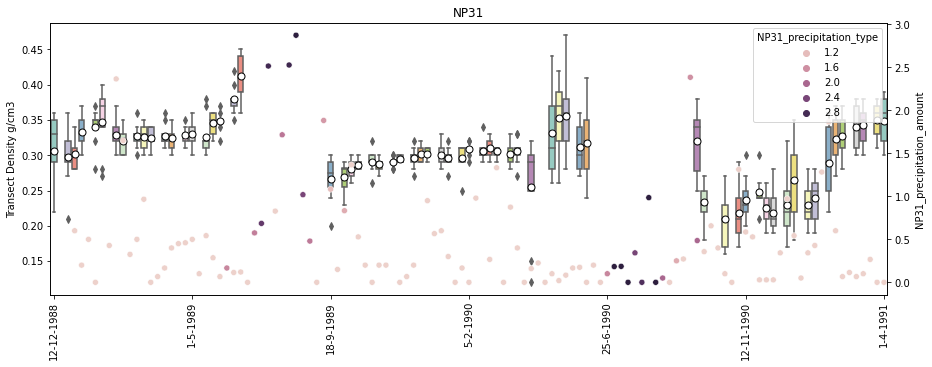

In [40]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df6.iloc[:,4:13].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df6.index, y="NP31_precipitation_amount", data=df6, hue='NP31_precipitation_type', ax=ax2, ci=None)
#sns.scatterplot(x=df4.index, y='NP31_wind_speed', data=df4, ax=ax2, ci=None, color='green')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df6.index[::20])
ax.set_xticklabels(df6.day_month_year[::20], rotation=90)
plt.title('NP31')

plt.show()

In [41]:
df7 = pd.DataFrame({"NP26_precipitation_type":dp26.precipitation_type, "NP26_precipitation_amount":dp26.precipitation_amount, "0":df26_transposed.iloc[:,0], "1":df26_transposed.iloc[:,1], "2":df26_transposed.iloc[:,2], "3":df26_transposed.iloc[:,3], "4":df26_transposed.iloc[:,4], "5":df26_transposed.iloc[:,5], "6":df26_transposed.iloc[:,6], "7":df26_transposed.iloc[:,7], "8":df26_transposed.iloc[:,8],"9":df26_transposed.iloc[:,9]}, index=None, columns=None)
df7 = df7.resample('W-MON').mean()

df7.reset_index(inplace=True)
df7['day'] = df7['index'].dt.day
df7['month'] = df7['index'].dt.month
df7['year'] = df7['index'].dt.year
#df.set_index('index', inplace=True)

cols = ['day','month', 'year']
df7['day_month_year'] = df7[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

df7

,index,NP26_precipitation_type,NP26_precipitation_amount,0,1,2,3,4,5,6,7,8,9,day,month,year,day_month_year
0,1983-06-06,1.4,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,1983,6-6-1983
1,1983-06-13,1.2,0.74,0.27,0.26,0.33,0.37,0.32,0.310,0.040497,10.0,6.0,1983.0,13,6,1983,13-6-1983
2,1983-06-20,1.0,0.75,0.33,0.29,0.32,0.37,0.35,0.332,0.027129,20.0,6.0,1983.0,20,6,1983,20-6-1983
3,1983-06-27,1.6,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,6,1983,27-6-1983
4,1983-07-04,2.0,1.14,0.38,0.28,0.30,0.49,0.42,0.374,0.077356,30.0,6.0,1983.0,4,7,1983,4-7-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1986-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,1.0,1986.0,20,1,1986,20-1-1986
138,1986-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1.0,1986.0,27,1,1986,27-1-1986
139,1986-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1986,3-2-1986
140,1986-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,1986.0,10,2,1986,10-2-1986


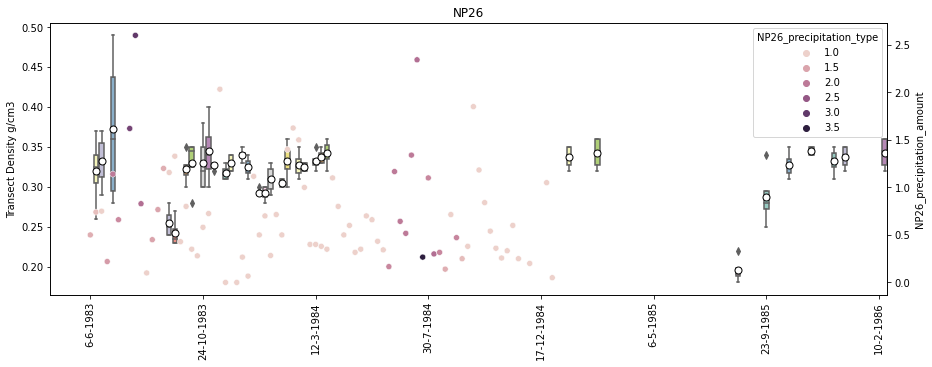

In [43]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df7.iloc[:,4:8].T, ax=ax, showmeans=True, palette="Set3",meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

ax2 = ax.twinx()
sns.scatterplot(x=df7.index, y="NP26_precipitation_amount", data=df7, hue='NP26_precipitation_type', ax=ax2, ci=None)
#sns.scatterplot(x=df4.index, y='NP31_wind_speed', data=df4, ax=ax2, ci=None, color='green')

ax.set_ylabel('Transect Density g/cm3')

ax.set_xticks(df7.index[::20])
ax.set_xticklabels(df7.day_month_year[::20], rotation=90)
plt.title('NP26')

plt.show()